# Классификация заемщиков линейными моделями

## курс "Машинное обучение 1", программа AIMasters, 2022

## Студент: <Введите ваше ФИО>

## Формулировка задания
Данное задание направлено на ознакомление с линейными моделями и градиентными методами обучения. В
задании необходимо: <br>
1. Написать на языке Python собственную реализацию линейного классификатора с произвольной функцией потерь и реализацию функции и градиента функции потерь для логистической регрессии. Реализации можно частично проверить через юнит-тесты и с помощью системы ejudge в соответствующем соревновании. <br><br> **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения. 


2. Вывести все необходимые формулы, привести выкладки в отчёте. 


3. Провести описанные ниже эксперименты с модельными данными и приложенным датасетом в данном ноутбуке. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно. <br><br> **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать: `File -> Download as -> HTML (.html)`. Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de). Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями. <br><br> Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.


### Некоторые полезные советы
1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль knn, можно добавить ячейку с таким содержимым:
```python
%load_ext autoreload
%autoreload 2
```


2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `modules` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:
```text
tree
    ---modules
    ------__init__.py
    ------linear_model.py
    ------losses.py
    ------utils.py
    ------tests.py
    HW2_*.ipynb
```

In [1]:
%load_ext autoreload
%autoreload 2

## Теоретическая часть (1 балл)
Выведите формулу градиента функции потерь (по параметру $w$) для задачи бинарной логистической регрессии. <br>
Считайте для удобства, что $x[0] = 1$ для любого объекта, то есть $w[0] - \texttt{bias}$. <br>
Так, в выведенном вами градиенте, $\texttt{grad}[1:]$ - градиент по весам, $\texttt{grad}[0]$ - градиент по $\texttt{bias}$.

$$L(a(x), y) = \log(1 + \exp(-y\langle w, x\rangle)), \quad y \in \{-1, 1\}$$

Запишите вывод градиента ниже.

$\nabla \log{(1 + \exp{(-y\langle w,x \rangle)})} = \frac{(\exp{(-y\langle w, x \rangle)})'}{1 + exp(-y\langle w, x \rangle)} = \frac{\exp{(-y\langle w, x \rangle)}*(-y * w)}{1 + exp(-y\langle w, x \rangle)}$. 

Домножим числитель и знаменатель на $\exp{(y\langle w, x \rangle)}$

Получим $\frac{-y * w}{1 + \exp(y\langle w, x \rangle)}$

Ответ:$\frac{-y * w}{1 + \exp(y\langle w, x \rangle)}$

## Реализация алгоритмов (4 баллов)
Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить все
тесты. Задание, не проходящее все тесты, приравнивается к невыполненному. 


При написании необходимо пользоваться стандартными средствами языка Python, библиотеками `numpy, scipy и matplotlib`. Библиотекой `scikit-learn` для реализации модели пользоваться запрещается, но разрешается использовать её в процессе экспериментов. Все
подробности реализации алгоритмов подробно описаны в спецификации к заданию.


Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые тесты, которые находятся в модуле `modules`. Чтобы запустить тесты в консоли требуется выполнить команду:
```c
$ pytest ./modules/tests.py

```

Разрешается дополнять файл тестами для самопроверки. Доп баллы за написание своих тестов не будет :)

## Эксперименты (10 баллов)

Эксперименты будем проводить на [датасете](https://www.kaggle.com/competitions/home-credit-default-risk/overview) по классификации заемщиков на плохих (target = 1: клиент с "payment difficulties") и хороших (target = 0: все остальные). Для экспериментов будем использовать лишь основной файл `application_train.csv`, а также перекодируем таргет в метки -1, 1.

Описание колонок находится в файле `description.csv`.

Для начала мы за вас считаем данные и поделим на обучение, валидацию и тест случайным образом.

In [2]:
import numpy as np, pandas as pd

%load_ext autoreload
%autoreload 2

# %load_ext - https://ipython.readthedocs.io/en/stable/interactive/magics.html
# %autoreload - https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

data = pd.read_csv('data/application_train.csv')
data.columns = ['_'.join([word.lower() for word in col_name.split(' ') if word != '-']) for col_name in data.columns]

data.target = data.target.map({0: -1, 1: 1})

from IPython.display import display

print('\ntarget value_counts:')
display(data['target'].value_counts(dropna=False))

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

data.head(3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

target value_counts:


target
-1    282686
 1     24825
Name: count, dtype: int64

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,...,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,-1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,-1,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Неожиданная заметка**

С этого момента предлагается некоторым образом отмечать все "неоднозначные" моменты, которые диктует вам домашка. Пример комментирования таких мест в коде - ниже. Если такие места находятся в текстовой ячейке, нужно после нее создать ячейку и прокомментировать желаемые места. Пример:

In [3]:
#*! что такое "неоднозначные" моменты?
#*! "Если такие места находятся в текстовой ячейке..." - не раскрыт случай нахождения таких мест "между строк"

Под "неоднозначными" понимается нечто, что навязывается вам домашкой, но не является по вашему мнению оптимальным / единственно правильным способом сделать / делать то или иное с точки зрения логики.

К таким моментам НЕ относятся, например: <br>
разные способы фиксация сида, способы выбрать рандомные индексы без повторений, в общем все, что "в разных случаях" делает "примерно одно и то же" и работает "примерно одинаково".

Точное количество таких моментов в домашке не определено. Вы сами решаете, что комментировать.

За проявление внимательности можно будет получить бонусные баллы за работу!

In [4]:
np.random.seed(911)

test_size = int(0.2 * data.shape[0]) #*! почему 0.2?
val_size = int(0.3 * (data.shape[0] - test_size)) #*! почему 0.3?
test_idx = np.random.choice(data.shape[0], size=test_size, replace=False)

val_idx_candidates = np.setdiff1d(np.arange(data.shape[0]), test_idx)
val_idx = np.random.choice(val_idx_candidates, size=val_size, replace=False)

data_dict = dict()
data_dict['tst'] = data.loc[test_idx].reset_index(drop=True)
data_dict['val'] = data.loc[val_idx].reset_index(drop=True)

not_train_idx = np.union1d(test_idx, val_idx)
data_dict['tr'] = data.drop(index=not_train_idx)
data_dict['tr'].reset_index(drop=True, inplace=True)

for key, df in data_dict.items():
    print(key, 'shape:', df.shape)

tst shape: (61502, 122)
val shape: (73802, 122)
tr shape: (172207, 122)


### Часть первая. Погружаемся в "зону адекватности" гиперпараметров

Будем считать, для начала, что мы провели какую-то предобработку данных, и теперь мы готовы обучать на них нашу модель. Гиперпараметрами, которые хочется подобрать, являются `step_alpha`, `step_beta`, `batch_size`, `l2_coef`. Будем двигаться к тому, чтобы поизучать, как связаны между собой первые три. Для этого нужно зафиксировать коэффициент l2-регуляризации лосса на каком-нибудь адекватном значении. Будем использовать `optuna`, чтобы его выяснить (см. семинар про optuna).

Напишите ниже свою `objective_function`, которую в дальнейшем будем оптимизировать. Перебираемые гиперпараметры даны выше; подумайте, как лучше задать их распределения. Положите `tolerance = 2e-4, max_iter = 30, random_seed = 911`. 

В качестве меры качества предлагается использовать ваш реализованный `BinaryLogisticLoss` на валидации без учета слагаемого, отвечающего за регуляризацию.

**Совет:** не включайте значения `batch_size` сильно меньше 300, это приведет к очень долгому времени одной эпохи. <br>

In [8]:
import optuna

from modules.linear_model import LinearModel
from modules.losses import BinaryLogisticLoss

def objective(trial, X_tr, y_tr, X_val, y_val):
    l2_coef = trial.suggest_float('l2_coef', 1e-3, 3, log=True)
    params = {
        'loss_function': BinaryLogisticLoss(l2_coef=l2_coef),
        'batch_size': trial.suggest_int('batch_size', 300, 10000, log=False, step=100),
        'step_alpha': trial.suggest_float('step_alpha', 1e-2, 10, log=True),
        'step_beta': trial.suggest_float('step_beta', 0.8, 3, log=True),
        'max_iter': 30,
        'tolerance': 1e-4,
        'random_seed': 911
    }
    my_model = LinearModel(**params)
    my_model.fit(X_tr, y_tr, trace=False)
    
    f_val = my_model.get_objective(X_val, y_val)
    return f_val

Напишите функцию `start_optimization`, запускающую сессию оптимизации, используя входные параметры для предобработки данных:

В ней создайте объект сессии оптимизации - `study` с `sampler=sampler`. Подготовьте ваш `objective_func` и данные (в качестве фичей по умолчанию будем использовать все числовые признаки, а обрабатывать данные по умолчанию будем минимальным простым пайплайном, приведенным ниже).

Функция должна возвращать `study`. <br>
Для простоты можете брать только признаки с типом `np.number`. <br>
**Совет:** Не забывайте указывать параметр `n_jobs` у `study.optimize`, чтобы ускорить эксперименты.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from functools import partial

def start_optimization(
    objective_func, # принимает trial, X_tr, y_tr, X_val, y_val, **other_objective_kwargs
    n_trials,
    n_jobs,
    data_dict,
    study_direction=None,
    sampler=None,
    features=None,
    **other_objective_kwargs
):

    prep = make_pipeline(
        StandardScaler(),
        SimpleImputer(strategy='median')
    )
    
    if features is None:
        features = data.select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns
    
    X_tr, X_val = data_dict['tr'][features].values, data_dict['val'][features].values
    y_tr, y_val = data_dict['tr'].target.values, data_dict['val'].target.values
    X_tr = prep.fit_transform(X_tr)
    X_val = prep.transform(X_val)
    obj_func = partial(
        objective_func,
        X_tr=X_tr,
        X_val=X_val,
        y_tr=y_tr,
        y_val=y_val,
        **other_objective_kwargs
    )
    study = optuna.create_study(direction=study_direction, sampler=sampler)
    
    study.optimize(obj_func, n_trials=n_trials, n_jobs=n_jobs)
    
    return study

Запустите процесс оптимизации с `TPESampler`, предварительно настроив, как минимум, `n_startup_trials`; подумайте, какое `n_trials` выбрать.

In [10]:
sampler = optuna.samplers.TPESampler(n_startup_trials=75, n_ei_candidates=60)

study = start_optimization(
    objective,
    n_trials=150,
    n_jobs=5,
    data_dict=data_dict,
    study_direction='minimize',
    sampler=sampler
)

[I 2023-11-19 21:59:31,829] A new study created in memory with name: no-name-7444791b-4f21-4bfc-adbf-a1c164d0d47e
[I 2023-11-19 21:59:36,238] Trial 3 finished with value: 0.25314082501927115 and parameters: {'l2_coef': 0.001864852599125251, 'batch_size': 9800, 'step_alpha': 3.9508313168692797, 'step_beta': 0.860471847474704}. Best is trial 3 with value: 0.25314082501927115.
[I 2023-11-19 21:59:39,126] Trial 2 finished with value: 0.2711942162009702 and parameters: {'l2_coef': 0.1974334954162907, 'batch_size': 6800, 'step_alpha': 0.5650244880320876, 'step_beta': 1.4397882617181343}. Best is trial 3 with value: 0.25314082501927115.
[I 2023-11-19 21:59:55,720] Trial 4 finished with value: 0.3671816555274984 and parameters: {'l2_coef': 0.13148215037272232, 'batch_size': 7400, 'step_alpha': 0.07158414859494501, 'step_beta': 1.522966050305577}. Best is trial 3 with value: 0.25314082501927115.
[I 2023-11-19 21:59:56,087] Trial 0 finished with value: 0.4181412620844328 and parameters: {'l2_coe

[I 2023-11-19 22:01:04,638] Trial 32 finished with value: 0.2616025902364224 and parameters: {'l2_coef': 0.04537006539587441, 'batch_size': 4100, 'step_alpha': 0.6309685736384273, 'step_beta': 1.9924028992949678}. Best is trial 3 with value: 0.25314082501927115.
[I 2023-11-19 22:01:15,743] Trial 31 finished with value: 0.26791490621201475 and parameters: {'l2_coef': 0.004991137512760332, 'batch_size': 6500, 'step_alpha': 0.22391007900255577, 'step_beta': 1.2419817933566928}. Best is trial 3 with value: 0.25314082501927115.
[I 2023-11-19 22:01:22,951] Trial 30 finished with value: 0.26978250321916053 and parameters: {'l2_coef': 0.032705869715184896, 'batch_size': 1700, 'step_alpha': 0.05719473270752756, 'step_beta': 1.205786665882507}. Best is trial 3 with value: 0.25314082501927115.
[I 2023-11-19 22:01:27,619] Trial 35 finished with value: 0.4133740417311068 and parameters: {'l2_coef': 0.006559666531266478, 'batch_size': 3900, 'step_alpha': 0.01193705733267808, 'step_beta': 0.905443625

[I 2023-11-19 22:03:27,238] Trial 67 finished with value: 0.25653994629489973 and parameters: {'l2_coef': 0.001699211761223261, 'batch_size': 9300, 'step_alpha': 1.1525625729126712, 'step_beta': 1.763108802777923}. Best is trial 41 with value: 0.2530923199030675.
[I 2023-11-19 22:03:28,527] Trial 66 finished with value: 0.2690927075976893 and parameters: {'l2_coef': 0.0021626046542906584, 'batch_size': 8500, 'step_alpha': 6.251559724835454, 'step_beta': 2.2233171408110315}. Best is trial 41 with value: 0.2530923199030675.
[I 2023-11-19 22:03:30,056] Trial 65 finished with value: 0.2874818463121926 and parameters: {'l2_coef': 0.001130294527571117, 'batch_size': 6800, 'step_alpha': 0.23022652251629003, 'step_beta': 1.8732010055868853}. Best is trial 41 with value: 0.2530923199030675.
[I 2023-11-19 22:03:33,454] Trial 69 finished with value: 0.271735161669411 and parameters: {'l2_coef': 0.26694300652460645, 'batch_size': 800, 'step_alpha': 0.21391546034824965, 'step_beta': 0.8099706028511

[I 2023-11-19 22:04:41,608] Trial 92 finished with value: 0.2529424542916696 and parameters: {'l2_coef': 0.0013434790331590476, 'batch_size': 300, 'step_alpha': 1.403342619923497, 'step_beta': 1.6433301565485887}. Best is trial 81 with value: 0.25280140389467315.
[I 2023-11-19 22:04:44,907] Trial 94 finished with value: 0.2531775546104308 and parameters: {'l2_coef': 0.0013644132891050516, 'batch_size': 600, 'step_alpha': 2.4712286327822155, 'step_beta': 1.5275326856199807}. Best is trial 81 with value: 0.25280140389467315.
[I 2023-11-19 22:04:45,997] Trial 96 finished with value: 0.25305721010651283 and parameters: {'l2_coef': 0.0013796983577198194, 'batch_size': 900, 'step_alpha': 1.3556309078296396, 'step_beta': 1.6954485064142977}. Best is trial 81 with value: 0.25280140389467315.
[I 2023-11-19 22:04:46,072] Trial 97 finished with value: 0.2533549986164532 and parameters: {'l2_coef': 0.0013756308449685447, 'batch_size': 800, 'step_alpha': 1.2949291641030638, 'step_beta': 1.707003879

[I 2023-11-19 22:05:30,872] Trial 122 finished with value: 0.2528909138847569 and parameters: {'l2_coef': 0.001539682073075849, 'batch_size': 400, 'step_alpha': 4.251704105750133, 'step_beta': 1.68076174863672}. Best is trial 81 with value: 0.25280140389467315.
[I 2023-11-19 22:05:30,935] Trial 123 finished with value: 0.25313812572160443 and parameters: {'l2_coef': 0.001543924401096056, 'batch_size': 400, 'step_alpha': 4.251938871064295, 'step_beta': 1.6776687295903352}. Best is trial 81 with value: 0.25280140389467315.
[I 2023-11-19 22:05:31,792] Trial 125 finished with value: 0.2531275289795546 and parameters: {'l2_coef': 0.0015751933705007105, 'batch_size': 500, 'step_alpha': 1.7388254843451567, 'step_beta': 1.6813919227943601}. Best is trial 81 with value: 0.25280140389467315.
[I 2023-11-19 22:05:35,947] Trial 127 finished with value: 0.25296756604684817 and parameters: {'l2_coef': 0.001005086765264288, 'batch_size': 700, 'step_alpha': 1.4151846899035734, 'step_beta': 1.4673128782

In [15]:
def my_clipper(trial: optuna.trial.FrozenTrial):
    score = trial.value
    return min(100, score)
#Всего один неудачный trial

Визуализируйте результаты оптимизации с помощью `optuna.visualization.plot_slice`. 

In [14]:
from optuna.visualization import plot_slice

plot_slice(study, target = my_clipper)

/home/ochir/anaconda3/lib/python3.11/site-packages/optuna/visualization/_utils.py:67: UserWarning:

`target` is specified, but `target_name` is the default value, 'Objective Value'.



Опишите свои наблюдения. Если наблюдать вам мешает кривой масштаб графиков из-за слишком высоких значений лосса для некоторых trials, можно "зазумиться" в нужный интервал, выделяя на графике нужное подмножество точек или использовать аргумент `target`.

1)Чем меньше регуляризация, тем лучше целевая функция.

2)Для того, чтобы достичь хорошего резултата, шаг не обязательно должен быть большим или мальеньким. Лучшие результаты у относительно средних размером $\alpha$ и не очень маленьких $\beta$. Последние trial были в районе step_alpha=1 и step_beta = 1.5

3)Лучшие результаты у маленьких batch_size

**Ответьте на вопросы:**

1) Почему не нужно включать слагаемое, отвечающее за регуляризацию, в подсчет лосса для подбора гиперпараметров?

Мы ищем оценку максимального правдоподобия, т.е ищем при каком $w$ значение лосса будет минимальным на валидации, а регуляризация будет некорректно влиять на значение лосса и например хороший вариант большая регуляризация будет делать хуже, а маленькая регуляризация будет плохой вариант лучше

2) Почему, если нашей целью является подбор адекватного коэффициента l2-регуляризации, мы включали в перебор остальные гиперпараметры?

Посмотреть, каким коэффициентам какие лучше всего подходят гиперпараметры

Давайте теперь посмотрим на то, что у нас получилось. Предлагается не сразу брать лучший по скору оптимизации `trial`, а сделать вывод, используя дополнительные данные.

  Используя график `plot_slice` выше и `study.trials`, выберите 3 лучших на ваш взгляд trial-кандидата для дальнейшего изучения.<br> Объясните ваш выбор. Если нужно, визуализируйте адекватным и наглядным образом вашу логику, чтобы проверяющий мог без труда в ней убедиться. 

Возьмем лучший по objective, 40й результат и 80й результат. Так как у них всех приемлимые резуьтаты objective. А 80, так как его коэфициент регуляризации сильно больше, чем у 40 и 0

In [22]:
values = np.asarray(study.trials_dataframe()['value'])
values[np.isnan(values)] = 100

In [37]:
trials = study.get_trials(deepcopy=True, states=None)

ind_best = np.argsort(values)

trial1 = trials[ind_best[0]]
trial2 = trials[ind_best[40]]
trial3 = trials[ind_best[80]]

param1 = trials[ind_best[0]]._params
param2 = trials[ind_best[40]]._params
param3 = trials[ind_best[80]]._params

In [41]:
prep = make_pipeline(
        StandardScaler(),
        SimpleImputer(strategy='median')
    )
features = None
if features is None:
    features = data.select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns

In [42]:
X_tr, X_val = data_dict['tr'][features].values, data_dict['val'][features].values
y_tr, y_val = data_dict['tr'].target.values, data_dict['val'].target.values
X_tr = prep.fit_transform(X_tr)
X_val = prep.transform(X_val)

Обучите по модели на каждый из трех `trial`-кандидатов, собирая историю на обучении и валидации. Положите обученные модели и полученные истории в словари по ключу `trial.number`.

In [44]:
lm_1 = LinearModel(batch_size=trial1._params['batch_size'],
        loss_function=BinaryLogisticLoss(l2_coef=trial1._params['l2_coef']),
        step_alpha=trial1._params['step_alpha'],
        step_beta=trial1._params['step_beta'],
        tolerance=1e-4,
        max_iter=40,
        random_seed=911)
history1 = lm_1.fit(X_tr, y_tr, trace=True)
lm_2 = LinearModel(batch_size=trial2._params['batch_size'],
        loss_function=BinaryLogisticLoss(l2_coef=trial2._params['l2_coef']),
        step_alpha=trial2._params['step_alpha'],
        step_beta=trial2._params['step_beta'],
        tolerance=1e-4,
        max_iter=40,
        random_seed=911)
history2  = lm_2.fit(X_tr, y_tr, trace=True)
lm_3 = LinearModel(batch_size=trial3._params['batch_size'],
        loss_function=BinaryLogisticLoss(l2_coef=trial3._params['l2_coef']),
        step_alpha=trial3._params['step_alpha'],
        step_beta=trial3._params['step_beta'],
        tolerance=1e-4,
        max_iter=40,
        random_seed=911)
history3 = lm_3.fit(X_tr, y_tr, trace=True)

In [45]:
history = list([history1, history2, history3])
models = list([lm_1, lm_2, lm_3])
top_trials = list([trial1, trial2, trial3])

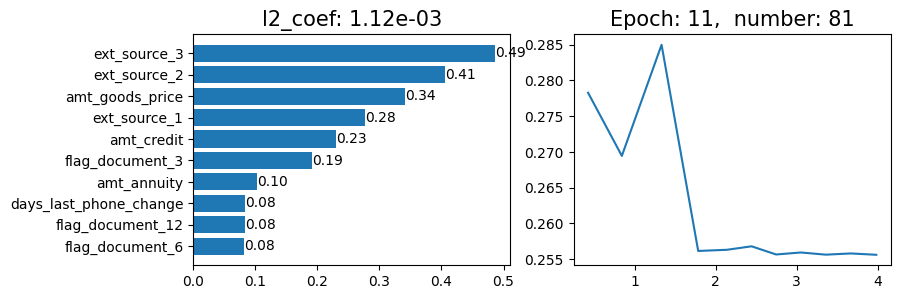

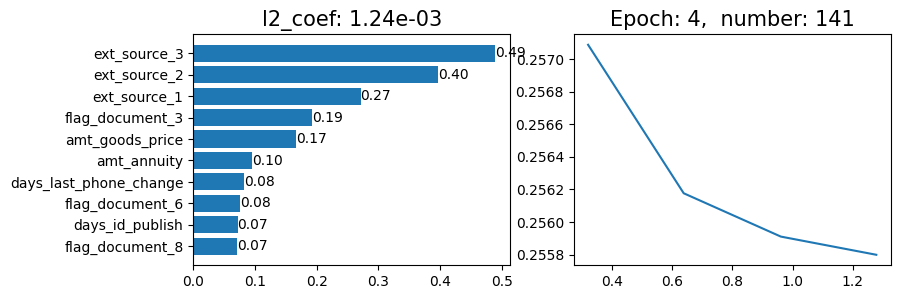

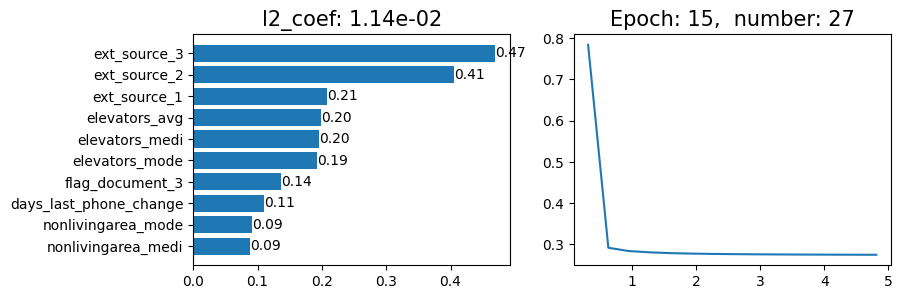

In [55]:
import matplotlib.pyplot as plt

def plot_trial_info(trial, models, history, top_k, *your_args, **your_kwargs):
    fig, axs = plt.subplots(1, 2, figsize=(9, 3))
    w = np.abs(models.get_weights())
    ind = np.argsort(w)[::-1]
    ind = ind[:top_k]
    hbars = axs[0].barh(features[ind], w[ind], align='center')
    axs[0].invert_yaxis()
    axs[0].set_title(f'l2_coef: {models.loss_function.l2_coef:.2e}', fontsize=15)
    axs[0].bar_label(hbars, fmt='%.2f')
    t = np.cumsum(history['time'])
    ep = len(history['time'])
    axs[1].plot(t,history['func_val'])
    axs[1].set_title(f'Epoch: {ep},  number: {trial._number}', fontsize=15)
    plt.show()

top_k = 10
for i in range(3):
    plot_trial_info(top_trials[i], models=models[i], history=history[i], top_k=top_k)

Напишите функцию `plot_trial_info`, которая выводит "информацию" о поданном `trial`. В эту "информацию" обязательно должно входить:
- График `feature - weight`, показывающий `top_k` признаков по модулю веса и их значения весов. Признаки должны идти по убыванию модуля веса.<br>Используйте `ax.barh`. <br> Используйте `ax.bar_label`, чтобы подписать веса к барам.<br> Используйте `ax.set_title(f'l2_coef: {l2_coef:.2e}', fontsize=15)` для этого графика.


- График "время обучения - лосс" - на обучении и валидации. Укажите "количество эпох | batch_size" в качестве title к этому графику. <br> Используйте `ax.plot`.


- Что угодно еще, что поможет вам принять решение о том, почему вы выберете один trial из этих трех.
<br><br>

Настройте размер графиков, шрифт, легенду. Убедитесь, что в вашей "информации" присутствует `trial.number, batch_size`. <br>
Визуализируйте выбранные вами trials. Убедитесь в адекватности графиков.

Можно пользоваться рисовалкой с семинара по линейным моделям.

Опишите свои наблюдения. Если нужно, подключите визуализацию.

На всех трех моделях количество эпох не доходит до максимального заданного. Одна модель сходилась зиг-загообразно, вторая сошлась быстро и плавно, третья сошлась сначала быстро вниз, затем постепенное снижение

Какой в итоге коэффициент l2-регуляризации будем фиксировать для дальнейших экспериментов? <br>
Ответ объясните.

Возьмем коэффициент регуляризации как у третьейй модели. Так как он дальше от нуля, модель с ней сходится только вниз, а результат objective приемлимый

### Часть вторая. Research

Давайте зафиксируем выбранный коэффициент регуляризации и проведем несколько экспериментов с `step_alpha, step_beta, batch_size`. Но для начала посмотрим - возможно, нам удастся уменьшить размер признакового пространства без сильной потери качества, чтобы ускорить наши эксперименты.

Достаньте из словаря модель, соответствующую выбранному вами лучшему trial, и нарисуйте график отсортированных модулей ее весов.

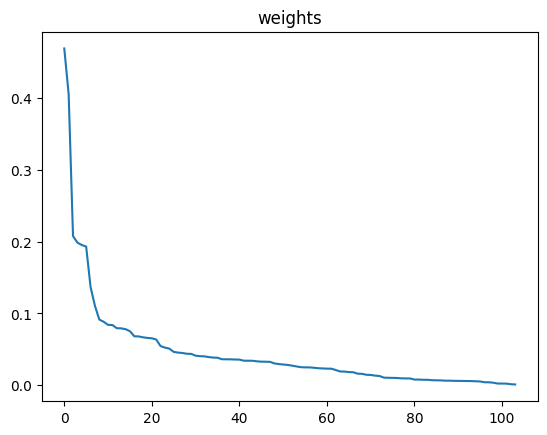

In [56]:
w = np.abs(models[2].get_weights())
plt.plot(np.sort(w)[::-1])
plt.title("weights")
plt.show()

Подумайте, можно ли убрать какую-то долю признаков? Если да, то какие признаки вы уберете для дальнейших экспериментов? <br>
Ответ объясните.

Возьмем 40 признаков с наибольшим весом. Веса очень быстро снижаются и уже после 25 снижение менее резкое

Напишите новую функцию `research_objective` для перебора `step_alpha, step_beta` при фиксированных `l2_coef, batch_size`. Остальные гиперпараметры оставьте без изменений с прошлого раза. Для перебора step_alpha используйте log-шкалу от 1e-3 до 20, для перебора step_beta - log-шкалу от 0.1 до 5.

Для `batch_size = 300, 1000, 10000` запустите по сессии оптимизации на выбранном вами множестве признаков, собирая каждый `study` в словарик по ключу batch_size. Используйте `n_trials = 200`, TPESampler с параметром `n_startup_trials = 100`.<br>

In [59]:
def research_objective(trial, batch_size, l2_coef, X_tr, y_tr, X_val, y_val):
    params = {
        'loss_function': BinaryLogisticLoss(l2_coef=l2_coef),
        'batch_size': batch_size,
        'step_alpha': trial.suggest_float('step_alpha', 1e-3, 20, log=True),
        'step_beta': trial.suggest_float('step_beta', 0.1, 5, log=True),
        'max_iter': 30,
        'tolerance': 2e-4,
        'random_seed': 911
    }
    
    my_model = LinearModel(**params)
    my_model.fit(X_tr, y_tr, trace=False)
    
    validation_loss = my_model.get_objective(X_val, y_val)
    return validation_loss

In [64]:
prep = make_pipeline(
        StandardScaler(),
        SimpleImputer(strategy='median')
    )
features = None
if features is None:
    features = data.select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns

In [65]:
X_tr, X_val = data_dict['tr'][features].values, data_dict['val'][features].values
y_tr, y_val = data_dict['tr'].target.values, data_dict['val'].target.values
X_tr = prep.fit_transform(X_tr)
X_val = prep.transform(X_val)

Используя `optuna.visualization.plot_contour`, нарисуйте график зависимости `step_alpha - step_beta - objective`. Используйте аргумент `target`, чтобы обрезать значения лоссов, которые портят тепловую карту. <br>
Для каждого `batch_size` выведите такой график в отдельной ячейке.

In [66]:
batch_sizes = [300, 1000, 10000]
research_features = np.argsort(w)[::-1][:40]


X_tr = X_tr[:,research_features]
X_val = X_val[:,research_features]
sampler = optuna.samplers.TPESampler(n_startup_trials=75, n_ei_candidates=60)
studies = dict()
for batch_size in batch_sizes:
    # your code here
    studies[batch_size] = optuna.create_study(direction='minimize', sampler=sampler)
    research_func = partial(
        research_objective,
        l2_coef = lm_3.loss_function.l2_coef,
        batch_size = batch_size,
        X_tr=X_tr,
        X_val=X_val,
        y_tr=y_tr,
        y_val=y_val
    )
    
    studies[batch_size].optimize(research_func, n_trials=200, n_jobs=5)

[I 2023-11-19 22:33:46,218] A new study created in memory with name: no-name-d15dd485-1014-475e-950e-f66759bf03e1
[I 2023-11-19 22:33:48,895] Trial 1 finished with value: 0.2551812932241857 and parameters: {'step_alpha': 0.6451196039237267, 'step_beta': 2.2457907659399843}. Best is trial 1 with value: 0.2551812932241857.
[I 2023-11-19 22:33:49,583] Trial 4 finished with value: 0.2552562142798343 and parameters: {'step_alpha': 0.0506458440166077, 'step_beta': 0.5045787410629853}. Best is trial 1 with value: 0.2551812932241857.
[I 2023-11-19 22:33:50,967] Trial 3 finished with value: 0.25556972175613935 and parameters: {'step_alpha': 0.02523493890336003, 'step_beta': 0.2672265699631459}. Best is trial 1 with value: 0.2551812932241857.
[I 2023-11-19 22:33:52,166] Trial 5 finished with value: 0.2552045608376247 and parameters: {'step_alpha': 15.483789538003396, 'step_beta': 3.0163389503274125}. Best is trial 1 with value: 0.2551812932241857.
[I 2023-11-19 22:33:52,984] Trial 6 finished wit

[I 2023-11-19 22:35:07,032] Trial 37 finished with value: 0.2705925778266182 and parameters: {'step_alpha': 0.0027922598532082797, 'step_beta': 0.47844855101753775}. Best is trial 27 with value: 0.25504837602514047.
[I 2023-11-19 22:35:15,324] Trial 40 finished with value: 0.25675835181801016 and parameters: {'step_alpha': 0.8373809367602393, 'step_beta': 0.15148067212726632}. Best is trial 27 with value: 0.25504837602514047.
[I 2023-11-19 22:35:17,201] Trial 44 finished with value: 0.4706138813431309 and parameters: {'step_alpha': 0.0019790538578717187, 'step_beta': 2.3118496970829367}. Best is trial 27 with value: 0.25504837602514047.
[I 2023-11-19 22:35:19,503] Trial 46 finished with value: 0.25999842922628463 and parameters: {'step_alpha': 0.04627244897985422, 'step_beta': 4.168707006975421}. Best is trial 27 with value: 0.25504837602514047.
[I 2023-11-19 22:35:19,744] Trial 41 finished with value: 0.2589868867534528 and parameters: {'step_alpha': 1.1271529478967897, 'step_beta': 0

[I 2023-11-19 22:36:28,604] Trial 81 finished with value: 0.2550224539989289 and parameters: {'step_alpha': 0.7197810806500236, 'step_beta': 2.6306238435304787}. Best is trial 57 with value: 0.25499286116091163.
[I 2023-11-19 22:36:30,166] Trial 83 finished with value: 0.25520798061917216 and parameters: {'step_alpha': 0.18149923565541126, 'step_beta': 1.7800425553742727}. Best is trial 57 with value: 0.25499286116091163.
[I 2023-11-19 22:36:30,553] Trial 82 finished with value: 0.25506825396156074 and parameters: {'step_alpha': 0.1788014019863168, 'step_beta': 1.695454205037047}. Best is trial 57 with value: 0.25499286116091163.
[I 2023-11-19 22:36:31,458] Trial 75 finished with value: 0.2562892861707484 and parameters: {'step_alpha': 0.37742311074423524, 'step_beta': 0.14336605004293176}. Best is trial 57 with value: 0.25499286116091163.
[I 2023-11-19 22:36:32,846] Trial 85 finished with value: 0.2553796756475276 and parameters: {'step_alpha': 0.11385467657613155, 'step_beta': 2.6246

[I 2023-11-19 22:36:54,041] Trial 117 finished with value: 0.25507363484842144 and parameters: {'step_alpha': 1.2065146548346841, 'step_beta': 2.8687304740409063}. Best is trial 92 with value: 0.25491398931268416.
[I 2023-11-19 22:36:54,525] Trial 119 finished with value: 0.2551380798397876 and parameters: {'step_alpha': 0.8108304717172772, 'step_beta': 4.316499548225958}. Best is trial 92 with value: 0.25491398931268416.
[I 2023-11-19 22:36:54,545] Trial 118 finished with value: 0.255129096409948 and parameters: {'step_alpha': 0.8410803340238365, 'step_beta': 4.436718323186955}. Best is trial 92 with value: 0.25491398931268416.
[I 2023-11-19 22:36:54,606] Trial 120 finished with value: 0.2551033569034672 and parameters: {'step_alpha': 0.8384837686675068, 'step_beta': 4.475092203315473}. Best is trial 92 with value: 0.25491398931268416.
[I 2023-11-19 22:36:55,747] Trial 121 finished with value: 0.2550620116893371 and parameters: {'step_alpha': 0.5856737137631123, 'step_beta': 4.5344696

[I 2023-11-19 22:37:15,014] Trial 156 finished with value: 0.25514953518985806 and parameters: {'step_alpha': 4.377161000488239, 'step_beta': 4.209916570176981}. Best is trial 142 with value: 0.25485041123351454.
[I 2023-11-19 22:37:15,392] Trial 157 finished with value: 0.255143971280436 and parameters: {'step_alpha': 4.213811294875584, 'step_beta': 4.226227664591564}. Best is trial 142 with value: 0.25485041123351454.
[I 2023-11-19 22:37:16,283] Trial 159 finished with value: 0.25503722763667014 and parameters: {'step_alpha': 2.0091941054381635, 'step_beta': 3.7773361542962363}. Best is trial 142 with value: 0.25485041123351454.
[I 2023-11-19 22:37:16,404] Trial 158 finished with value: 0.25509724384318666 and parameters: {'step_alpha': 2.0692310508480873, 'step_beta': 3.654557465060605}. Best is trial 142 with value: 0.25485041123351454.
[I 2023-11-19 22:37:16,953] Trial 160 finished with value: 0.25504533585706063 and parameters: {'step_alpha': 2.0804344352102393, 'step_beta': 3.74

[I 2023-11-19 22:37:36,465] Trial 195 finished with value: 0.25500898283046036 and parameters: {'step_alpha': 1.5455687270029883, 'step_beta': 4.976890994383293}. Best is trial 179 with value: 0.254807796517938.
[I 2023-11-19 22:37:36,704] Trial 196 finished with value: 0.25489630468638724 and parameters: {'step_alpha': 1.4981821757116445, 'step_beta': 4.947688074186245}. Best is trial 179 with value: 0.254807796517938.
[I 2023-11-19 22:37:36,860] Trial 197 finished with value: 0.2550968892222777 and parameters: {'step_alpha': 1.5285211854479226, 'step_beta': 4.972106881868502}. Best is trial 179 with value: 0.254807796517938.
[I 2023-11-19 22:37:37,310] Trial 198 finished with value: 0.2552197544760602 and parameters: {'step_alpha': 1.5999500424382642, 'step_beta': 4.969442709190924}. Best is trial 179 with value: 0.254807796517938.
[I 2023-11-19 22:37:37,363] Trial 199 finished with value: 0.2549397241267957 and parameters: {'step_alpha': 0.9620365299844708, 'step_beta': 4.9868651047

[I 2023-11-19 22:38:29,403] Trial 27 finished with value: 0.4486918477942338 and parameters: {'step_alpha': 0.0016235936732785174, 'step_beta': 0.6598879612529636}. Best is trial 10 with value: 0.25491413057714535.
[I 2023-11-19 22:38:29,541] Trial 38 finished with value: 0.2554070018413783 and parameters: {'step_alpha': 0.3092807058826199, 'step_beta': 0.10997948506015423}. Best is trial 10 with value: 0.25491413057714535.
[I 2023-11-19 22:38:31,223] Trial 40 finished with value: 0.25526927905030133 and parameters: {'step_alpha': 1.0709473610118188, 'step_beta': 1.2585657076972472}. Best is trial 10 with value: 0.25491413057714535.
[I 2023-11-19 22:38:31,263] Trial 39 finished with value: 0.2554410514665123 and parameters: {'step_alpha': 0.5204238911436241, 'step_beta': 4.911667264185315}. Best is trial 10 with value: 0.25491413057714535.
[I 2023-11-19 22:38:32,593] Trial 37 finished with value: 0.632194527718635 and parameters: {'step_alpha': 0.0020457417761806933, 'step_beta': 2.349

[I 2023-11-19 22:39:24,693] Trial 77 finished with value: 0.25508062445385205 and parameters: {'step_alpha': 0.3554478089133541, 'step_beta': 0.14631947949962634}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:39:26,545] Trial 76 finished with value: 0.2985211087897442 and parameters: {'step_alpha': 0.04060471922368377, 'step_beta': 2.8174643481089796}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:39:27,036] Trial 64 finished with value: 0.3682732738626639 and parameters: {'step_alpha': 0.0018586013972087952, 'step_beta': 0.3869423369773378}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:39:28,441] Trial 79 finished with value: 0.25510821227928066 and parameters: {'step_alpha': 0.7559152814522545, 'step_beta': 3.422032894904076}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:39:28,836] Trial 80 finished with value: 0.2550833332047517 and parameters: {'step_alpha': 0.730534994932554, 'step_beta': 3.42717055

[I 2023-11-19 22:39:44,649] Trial 112 finished with value: 0.25529693156841676 and parameters: {'step_alpha': 0.8000243592086026, 'step_beta': 1.2087423619745223}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:39:44,839] Trial 113 finished with value: 0.25500132647153 and parameters: {'step_alpha': 0.7730638422874629, 'step_beta': 1.1635741524360028}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:39:45,668] Trial 115 finished with value: 0.25500246748382754 and parameters: {'step_alpha': 0.7384633829857813, 'step_beta': 1.1332166557830863}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:39:46,856] Trial 114 finished with value: 0.25532507974784174 and parameters: {'step_alpha': 4.706069681745324, 'step_beta': 1.1623538823778248}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:39:48,065] Trial 118 finished with value: 0.2551301013328013 and parameters: {'step_alpha': 5.650205029481588, 'step_beta': 1.597363574

[I 2023-11-19 22:40:02,000] Trial 154 finished with value: 0.25516245996257486 and parameters: {'step_alpha': 1.9119906648696472, 'step_beta': 2.3343157074015717}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:40:02,311] Trial 151 finished with value: 0.2551480125215242 and parameters: {'step_alpha': 3.0520399180592337, 'step_beta': 1.6820325172615693}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:40:02,494] Trial 152 finished with value: 0.25506768309048733 and parameters: {'step_alpha': 2.781125303028771, 'step_beta': 2.299131698078491}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:40:02,521] Trial 153 finished with value: 0.25500410576556426 and parameters: {'step_alpha': 1.9095623448709977, 'step_beta': 2.3044476270551133}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:40:02,528] Trial 155 finished with value: 0.2549803908039278 and parameters: {'step_alpha': 1.30560613239481, 'step_beta': 2.272129057

[I 2023-11-19 22:40:21,075] Trial 191 finished with value: 0.25516158227376795 and parameters: {'step_alpha': 1.1092882904623877, 'step_beta': 3.934974541174213}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:40:21,403] Trial 192 finished with value: 0.2551009252456537 and parameters: {'step_alpha': 1.1053779109342101, 'step_beta': 3.965479046475913}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:40:21,641] Trial 184 finished with value: 0.2554400293702129 and parameters: {'step_alpha': 14.235375677574847, 'step_beta': 1.3670650345040745}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:40:22,110] Trial 193 finished with value: 0.25508595660817074 and parameters: {'step_alpha': 1.1296911231744038, 'step_beta': 4.133851482880664}. Best is trial 66 with value: 0.2547400768259067.
[I 2023-11-19 22:40:22,559] Trial 194 finished with value: 0.2550921698880815 and parameters: {'step_alpha': 1.510847713998383, 'step_beta': 4.1759217652

[I 2023-11-19 22:41:07,107] Trial 27 finished with value: 0.2652634869947052 and parameters: {'step_alpha': 0.052427972864287846, 'step_beta': 0.1462174986793751}. Best is trial 17 with value: 0.25500076410697986.
[I 2023-11-19 22:41:08,070] Trial 29 finished with value: 0.5890706248352579 and parameters: {'step_alpha': 0.002682380636250131, 'step_beta': 0.5186896183362979}. Best is trial 17 with value: 0.25500076410697986.
[I 2023-11-19 22:41:08,267] Trial 34 finished with value: 0.2555972874776785 and parameters: {'step_alpha': 3.7315805093777703, 'step_beta': 0.23009660411504052}. Best is trial 17 with value: 0.25500076410697986.
[I 2023-11-19 22:41:08,515] Trial 31 finished with value: 0.41884740234260387 and parameters: {'step_alpha': 0.008577163500261309, 'step_beta': 0.2599173302431923}. Best is trial 17 with value: 0.25500076410697986.
[I 2023-11-19 22:41:11,692] Trial 32 finished with value: 0.2830945116269846 and parameters: {'step_alpha': 19.594037029928263, 'step_beta': 0.2

[I 2023-11-19 22:42:12,141] Trial 72 finished with value: 0.25483085825781515 and parameters: {'step_alpha': 3.6866122206589647, 'step_beta': 0.7190108981903911}. Best is trial 72 with value: 0.25483085825781515.
[I 2023-11-19 22:42:13,080] Trial 64 finished with value: 0.2791156182665792 and parameters: {'step_alpha': 0.18456301243041345, 'step_beta': 1.026727438891086}. Best is trial 72 with value: 0.25483085825781515.
[I 2023-11-19 22:42:13,690] Trial 69 finished with value: 0.4428194117447814 and parameters: {'step_alpha': 0.08539406710206784, 'step_beta': 2.392512697687225}. Best is trial 72 with value: 0.25483085825781515.
[I 2023-11-19 22:42:14,474] Trial 73 finished with value: 0.6625291851907167 and parameters: {'step_alpha': 0.004250418160119579, 'step_beta': 2.80387269514333}. Best is trial 72 with value: 0.25483085825781515.
[I 2023-11-19 22:42:15,806] Trial 74 finished with value: 0.2551910911144686 and parameters: {'step_alpha': 10.723664796742511, 'step_beta': 0.75548366

[I 2023-11-19 22:42:57,016] Trial 101 finished with value: 0.25814765113617905 and parameters: {'step_alpha': 10.813821481944734, 'step_beta': 1.9215641330232565}. Best is trial 80 with value: 0.2548021351091882.
[I 2023-11-19 22:42:57,213] Trial 109 finished with value: 0.255104132154545 and parameters: {'step_alpha': 4.393296711897393, 'step_beta': 1.5971644599570076}. Best is trial 80 with value: 0.2548021351091882.
[I 2023-11-19 22:42:57,523] Trial 110 finished with value: 0.2551378922780871 and parameters: {'step_alpha': 4.133917403419293, 'step_beta': 1.6471400023571432}. Best is trial 80 with value: 0.2548021351091882.
[I 2023-11-19 22:42:57,785] Trial 111 finished with value: 0.25518412654983336 and parameters: {'step_alpha': 3.62485119990294, 'step_beta': 1.2504388389327492}. Best is trial 80 with value: 0.2548021351091882.
[I 2023-11-19 22:42:57,970] Trial 102 finished with value: 0.2602874870517763 and parameters: {'step_alpha': 10.996784518460078, 'step_beta': 1.97057685721

[I 2023-11-19 22:43:18,740] Trial 143 finished with value: 0.254896276417326 and parameters: {'step_alpha': 12.640136284742331, 'step_beta': 1.5031701522000471}. Best is trial 142 with value: 0.25473215633223034.
[I 2023-11-19 22:43:19,106] Trial 147 finished with value: 0.2552604373862642 and parameters: {'step_alpha': 16.432312336988247, 'step_beta': 0.9769666363579943}. Best is trial 142 with value: 0.25473215633223034.
[I 2023-11-19 22:43:19,571] Trial 148 finished with value: 0.2552280474316075 and parameters: {'step_alpha': 16.762863832715183, 'step_beta': 1.676857097288753}. Best is trial 142 with value: 0.25473215633223034.
[I 2023-11-19 22:43:21,309] Trial 151 finished with value: 0.25556728976778753 and parameters: {'step_alpha': 16.37734869041099, 'step_beta': 1.0770341101361702}. Best is trial 142 with value: 0.25473215633223034.
[I 2023-11-19 22:43:21,399] Trial 152 finished with value: 0.25475125621011735 and parameters: {'step_alpha': 17.08137674000495, 'step_beta': 1.10

[I 2023-11-19 22:43:44,845] Trial 185 finished with value: 0.2549838000047718 and parameters: {'step_alpha': 14.75840531594524, 'step_beta': 1.5516802593487147}. Best is trial 142 with value: 0.25473215633223034.
[I 2023-11-19 22:43:44,926] Trial 187 finished with value: 0.254865374663691 and parameters: {'step_alpha': 14.797466306797057, 'step_beta': 1.5429506907776172}. Best is trial 142 with value: 0.25473215633223034.
[I 2023-11-19 22:43:45,443] Trial 186 finished with value: 0.25487327009604627 and parameters: {'step_alpha': 15.30737301344136, 'step_beta': 1.551311493085271}. Best is trial 142 with value: 0.25473215633223034.
[I 2023-11-19 22:43:45,664] Trial 188 finished with value: 0.2548795374083521 and parameters: {'step_alpha': 14.19861705457581, 'step_beta': 1.5575514927278247}. Best is trial 142 with value: 0.25473215633223034.
[I 2023-11-19 22:43:48,630] Trial 193 finished with value: 0.2551277935867198 and parameters: {'step_alpha': 16.520799045117347, 'step_beta': 1.3529

Опишите свои наблюдения.

In [67]:
from optuna.visualization import plot_contour

In [182]:
trials_300 = studies[300].get_trials(deepcopy=True, states=None)
trials_300[1].value

0.25353730213470727

In [68]:
def my_clipper(trial: optuna.trial.FrozenTrial):
    score = trial.value
    return min(0.28, score)

In [69]:
plot_contour(studies[300], params=['step_alpha', 'step_beta'], target=my_clipper)

/home/ochir/anaconda3/lib/python3.11/site-packages/optuna/visualization/_utils.py:67: UserWarning:

`target` is specified, but `target_name` is the default value, 'Objective Value'.



У лучших trials step_beta и step_alpha сосредоточены у step_beta $\geq 3$ и step_aplha $\geq 3$

In [70]:
plot_contour(studies[1000], params=['step_alpha', 'step_beta'], target=my_clipper)

Лучшие trial сосредоточены равномерно у $1\leq step_beta \leq5$ и $1\leq step_alpha\leq5$

In [71]:
plot_contour(studies[10000], params=['step_alpha', 'step_beta'], target=my_clipper)

Лучише trial сосредоточены у максимального step_alpha и $1\leq step_beta \leq 3$

Обучите по модели для каждого `batch_size` с лучшими `step_alpha, step_beta`. Соберите историю, сложите все в словари по ключу batch_size.

In [73]:
trial_300 = studies[300].best_trial
trial_1000 = studies[1000].best_trial
trial_10000 = studies[10000].best_trial

Визуализируйте результаты эксперимента. Нарисуйте графики `time-loss`, `epoch-loss`, `epoch-learning_rate`. <br>
На графике `epoch-loss` должно быть каким-либо образом отображено среднее время эпохи для каждого размера батча. <br>
Под `learning_rate` имеется в виду:
$$\eta_k  = \frac{\alpha}{k^{\beta}}, \quad \text{где $k$ - номер итерации (эпохи)}$$

In [79]:
lm_1 = LinearModel(batch_size=300,
        loss_function=BinaryLogisticLoss(l2_coef=lm_3.loss_function.l2_coef),
        step_alpha=trial_300._params['step_alpha'],
        step_beta=trial_300._params['step_beta'],
        tolerance=1e-5,
        max_iter=40,
        random_seed=911)
history1 = lm_1.fit(X_tr, y_tr, trace=True)
lm_2 = LinearModel(batch_size=1000,
        loss_function=BinaryLogisticLoss(l2_coef=lm_3.loss_function.l2_coef),
        step_alpha=trial_1000._params['step_alpha'],
        step_beta=trial_1000._params['step_beta'],
        tolerance=1e-5,
        max_iter=40,
        random_seed=911)
history2 = lm_2.fit(X_tr, y_tr, trace=True)
lm_3 = LinearModel(batch_size=10000,
        loss_function=BinaryLogisticLoss(l2_coef=lm_3.loss_function.l2_coef),
        step_alpha=trial_10000._params['step_alpha'],
        step_beta=trial_10000._params['step_beta'],
        tolerance=1e-5,
        max_iter=40,
        random_seed=911)
history3 = lm_3.fit(X_tr, y_tr, trace=True)

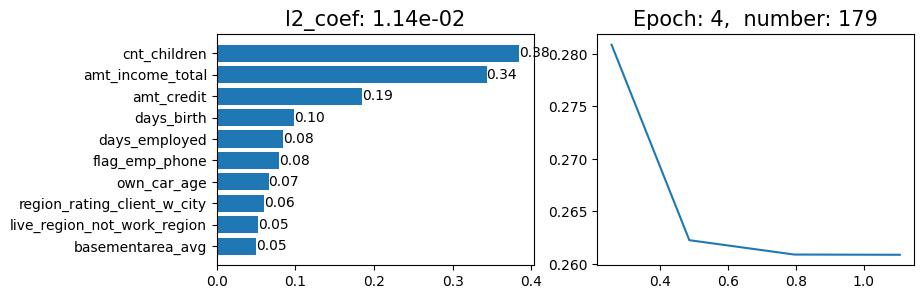

In [80]:
plot_trial_info(trial_300, models=lm_1, history=history1, top_k=10)

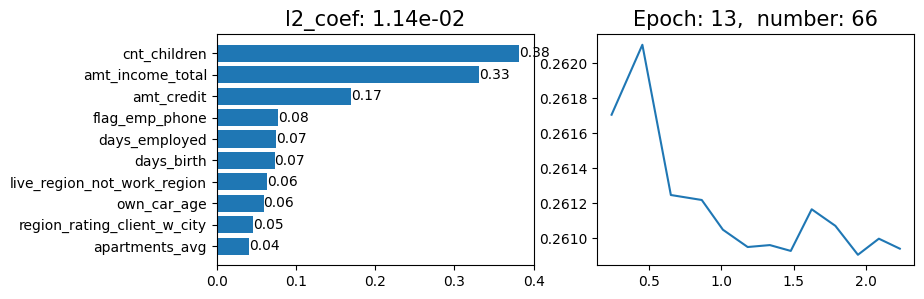

In [81]:
plot_trial_info(trial_1000, models=lm_2, history=history2, top_k=10)

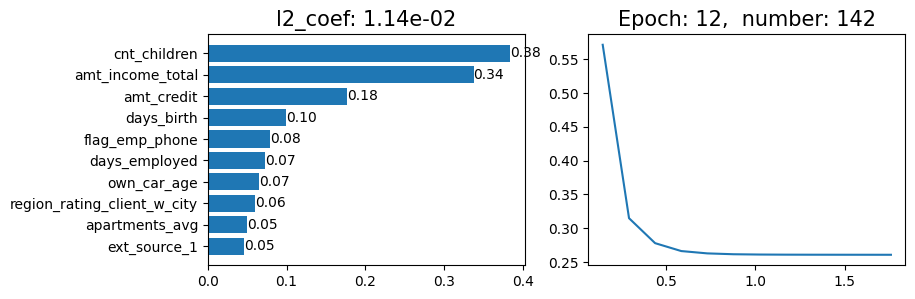

In [82]:
plot_trial_info(trial_10000, models=lm_3, history=history3, top_k=10)

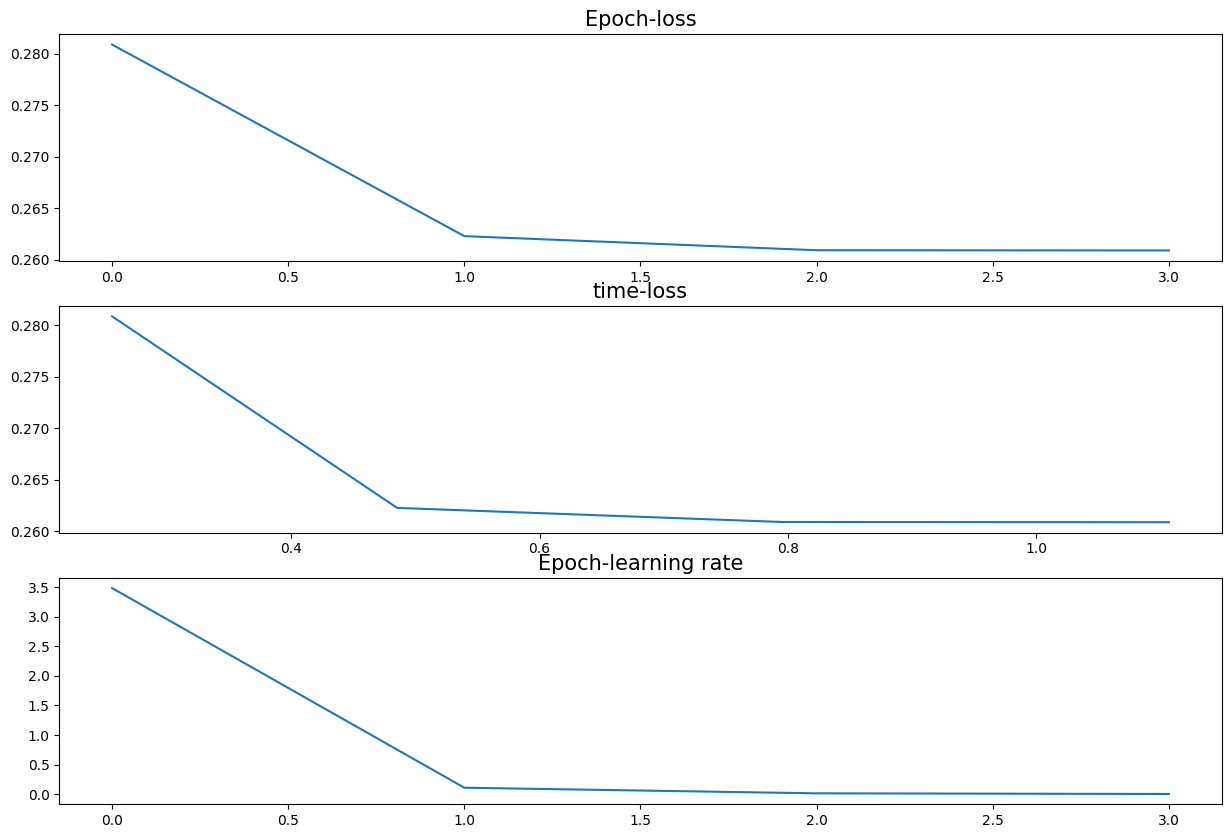

In [96]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
axs[0].plot(history1['func_val'])
axs[0].set_title(f'Epoch-loss', fontsize=15)
t = np.cumsum(history1['time'])
axs[1].plot(t,history1['func_val'])
axs[1].set_title(f'time-loss', fontsize=15)
lr = np.asarray([lm_1.step_alpha / ((i + 1) ** lm_1.step_beta) for i in range(len(history1['time']))])
axs[2].plot(lr)
axs[2].set_title(f'Epoch-learning rate', fontsize=15)
plt.show()

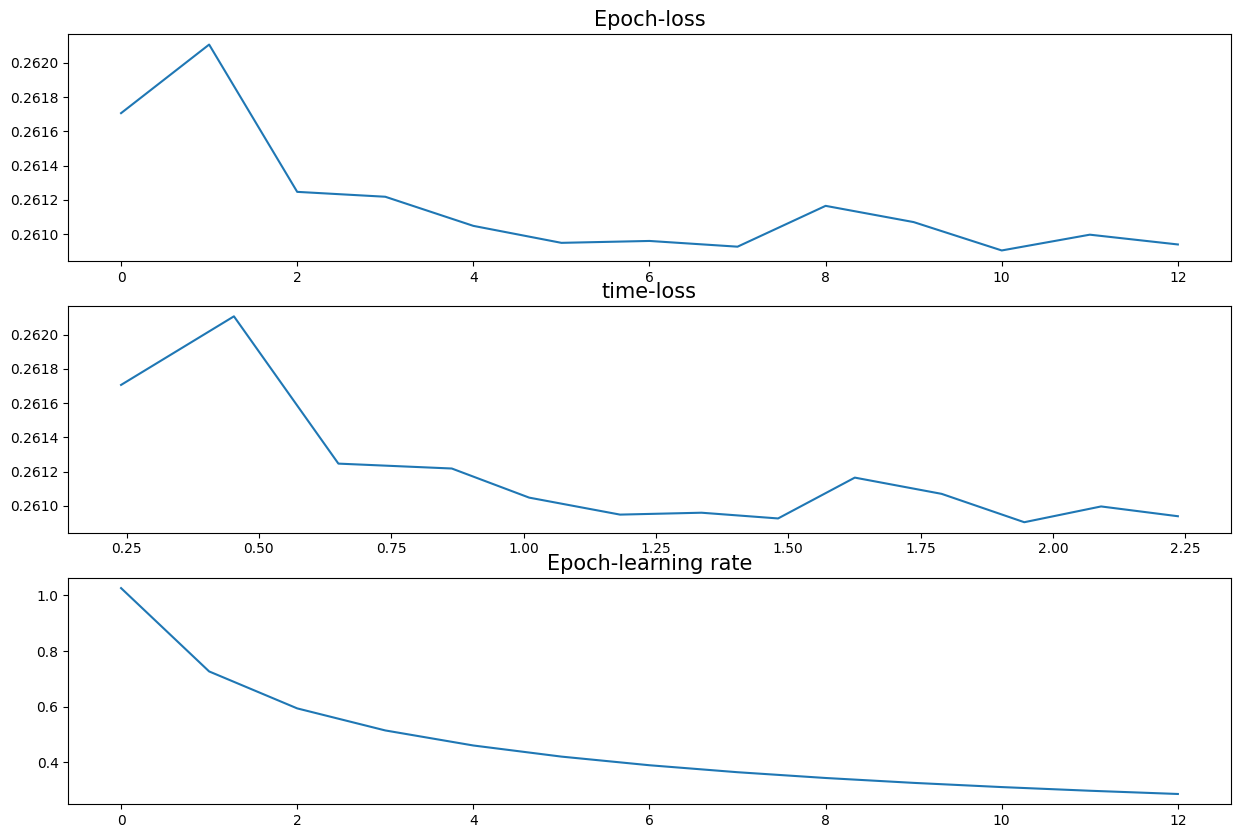

In [95]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
axs[0].plot(history2['func_val'])
axs[0].set_title(f'Epoch-loss', fontsize=15)
t = np.cumsum(history2['time'])
axs[1].plot(t,history2['func_val'])
axs[1].set_title(f'time-loss', fontsize=15)
lr = np.asarray([lm_2.step_alpha / ((i + 1) ** lm_2.step_beta) for i in range(len(history2['time']))])
axs[2].plot(lr)
axs[2].set_title(f'Epoch-learning rate', fontsize=15)
plt.show()

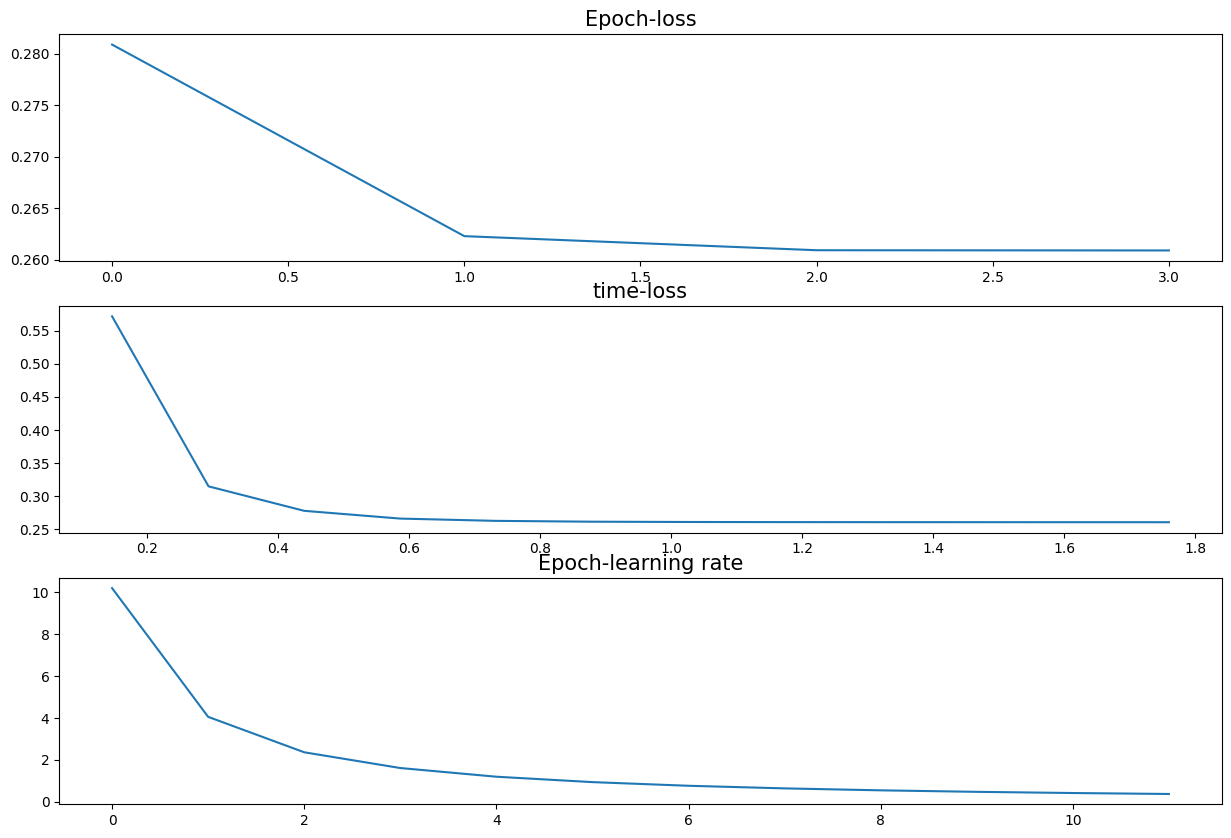

In [97]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
axs[0].plot(history1['func_val'])
axs[0].set_title(f'Epoch-loss', fontsize=15)
t = np.cumsum(history3['time'])
axs[1].plot(t,history3['func_val'])
axs[1].set_title(f'time-loss', fontsize=15)
lr = np.asarray([lm_3.step_alpha / ((i + 1) ** lm_3.step_beta) for i in range(len(history3['time']))])
axs[2].plot(lr)
axs[2].set_title(f'Epoch-learning rate', fontsize=15)
plt.show()

Какие выводы можно сделать из увиденного?

Модели обучаются очень быстро. Максимальное количество эпох 13 при точносте 1е-5

У нас получился пайплайн обучения модели на исходном наборе данных. Какие еще параметры этого пайплайна можно оптимизировать?

Изучить влияние размера тестовой и валидационной выборки. Посмотреть модели на разных размерах X_test 